## finale Simulation mit allen Funktionen

In diesem Notebook ist beschrieben, wie die Simulation final durchgeführt und ausgewertet werden kann. Das Simulations-Programm steht in dem python-file "model_final.py". Die zugehörigen Settings können vom User in der json "settings_final.json" eingestellt werden. Alternativ kann auch eine andere json beim Funktionsaufruf verwendet werden

In [ ]:
import importlib
import numpy as np
import model_v2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

## Einfacher Simulationsdurchlauf
Im Folgenden ist ein einfacher Simulationsdurchlauf zu sehen. Es dazu wird das Simulationsprogramm aus der entsprechenden Python-Datei geladen und mit der entsprechenden Settings-Datei ausgeführt:

In [2]:
import model_final
importlib.reload(model_final)
df_results, anzahl_evs, anzahl_evs_abgewiesen = model_final.simulation("settings_final.json")


soc_begin:  gauss , [35.46337675]
'Hyundai_KONA_64kWh' charged 36.60 kWh to 92.64 % SOC
soc_begin:  gauss , [26.21693755]
soc_begin:  gauss , [26.2536775]
'Porsche_Taycan' charged 51.73 kWh to 81.64 % SOC
'Porsche_Taycan' charged 69.54 kWh to 100.67 % SOC
soc_begin:  gauss , [33.77606414]
soc_begin:  gauss , [30.96164988]
'Hyundai_IONIQ5_LongRange' charged 43.62 kWh to 93.86 % SOC
'2021_FIAT_500e_Hatchback' charged 22.04 kWh to 83.45 % SOC
soc_begin:  gauss , [41.20535981]
soc_begin:  gauss , [30.43092195]
'Tesla_Model_SX_LR' charged 56.78 kWh to 97.98 % SOC
soc_begin:  gauss , [33.068345]
'Tesla_Model3_LR' charged 55.61 kWh to 100.47 % SOC
soc_begin:  gauss , [42.29993384]
'2021_FIAT_500e_Hatchback' charged 29.27 kWh to 100.13 % SOC
soc_begin:  gauss , [36.28652611]
'Tesla_ModelY' charged 52.28 kWh to 100.04 % SOC
'2021_FIAT_500e_Hatchback' charged 24.32 kWh to 100.20 % SOC
soc_begin:  gauss , [36.27136672]
soc_begin:  gauss , [41.91428964]
'VW_ID3_Pure_45kWh' charged 34.09 kWh to 100

## Auswertung des einfachen Durchlaufs
Es gibt verschiedene Wege den Simulationsdurchlauf auszuwerten. Unter anderem kann hierbei auf die Funktionen “plot” und “auswertung” in dem Python-File zurückgegriffen werden:

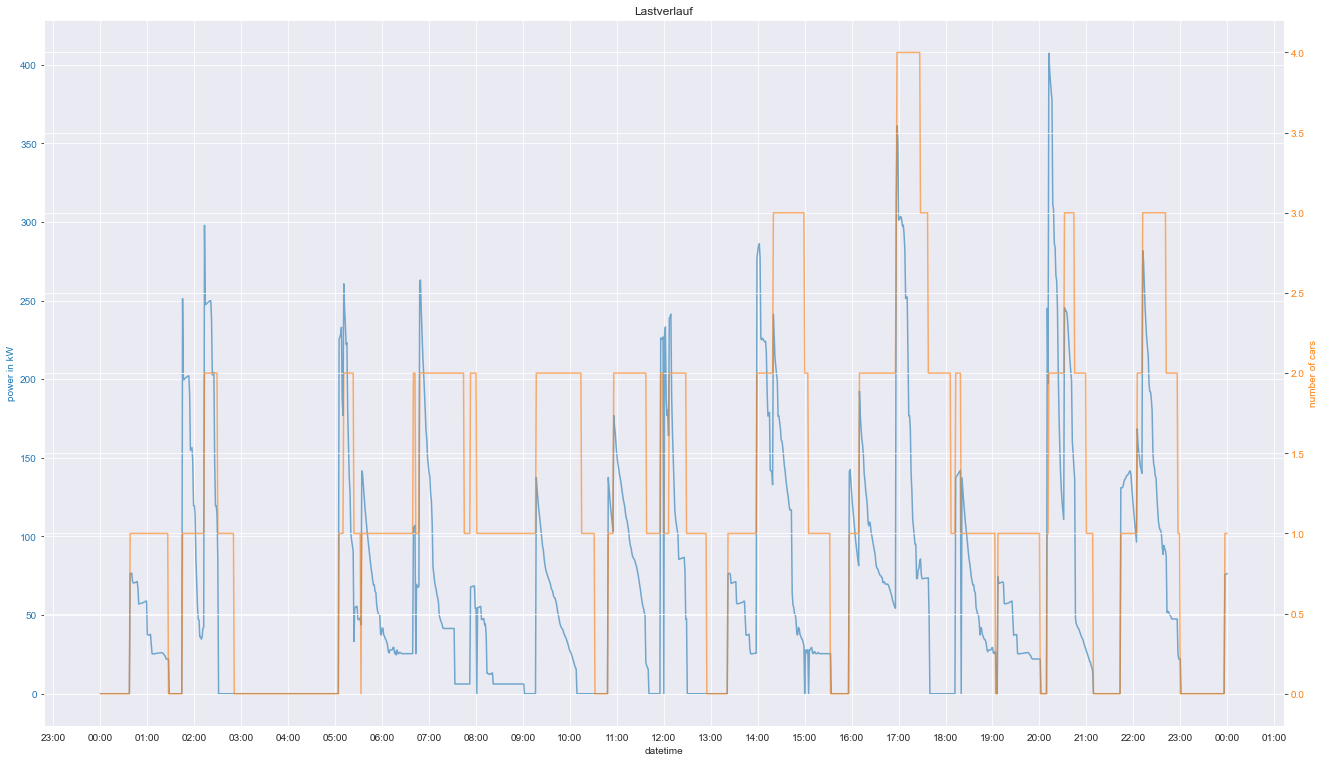

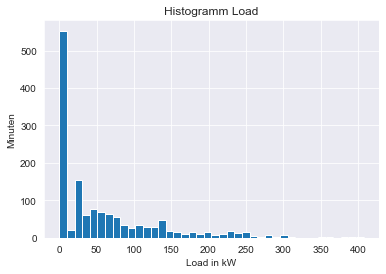

Maximale Last:  407.7231690860535 kWh
Minuten über 60% der maximalen Last (244.63 kWh): 51 Entsprechen  3.54 %
Minuten über 70% der maximalen Last (285.41 kWh): 21 Entsprechen  1.46 %
Minuten über 80% der maximalen Last (326.18 kWh): 7 Entsprechen  0.49 %
Minuten über 90% der maximalen Last (366.95 kWh): 5 Entsprechen  0.35 %
Minuten über 95% der maximalen Last (387.34 kWh): 3 Entsprechen  0.21 %


In [3]:
model_final.plot(df_results)
model_final.auswertung(df_results)

## Auswertung mit Pandas eigenen Boardmitteln
Dataframes können auf vielseitige Art und Weise ausgewertet werden. Exemplarisch wird hier der “describe”-Befehl für DataFrames genutzt:

In [4]:
df_results.describe()

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,59.746458,1.211659
std,74.957481,0.962651
min,0.000000,0.000000
25%,0.000000,0.000000
50%,28.591427,1.000000
75%,87.462201,2.000000
max,407.723169,4.000000


## Mehrere Durchläufe

Um die Auswirkungen bestimmter Faktoren auf das Simulationsergebnis zu betrachten ist es sinnvoll, die Simulation über mehrere Tage hinweg zu betrachten. Anschließend kann die Last beispielsweise in einem Histogramm oder ECDF-Plot veranschaulicht werden. In diesem Beispiel wird über 100 Tage simuliert:

In [8]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_final.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen


print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [44.66148635]
'2021_FIAT_500e_Hatchback' charged 22.56 kWh to 98.38 % SOC
soc_begin:  gauss , [35.91279368]
'2021_FIAT_500e_Hatchback' charged 24.95 kWh to 95.32 % SOC
soc_begin:  gauss , [22.35221254]
soc_begin:  gauss , [27.98707735]
'Hyundai_IONIQ5_LongRange' charged 56.58 kWh to 100.29 % SOC
'Porsche_Taycan' charged 68.00 kWh to 100.79 % SOC
soc_begin:  gauss , [41.71809201]
soc_begin:  gauss , [18.87885147]
'Tesla_Model_SX_LR' charged 46.32 kWh to 65.20 % SOC
soc_begin:  gauss , [36.51655412]
'2021_FIAT_500e_Hatchback' charged 24.52 kWh to 100.10 % SOC
soc_begin:  gauss , [34.50346711]
'Tesla_Model_SX_LR' charged 42.33 kWh to 78.85 % SOC
'VW_ID3_Pure_45kWh' charged 38.37 kWh to 100.66 % SOC
soc_begin:  gauss , [33.79722736]
'Tesla_Model_SX_LR' charged 44.15 kWh to 77.95 % SOC
soc_begin:  gauss , [28.13332672]
soc_begin:  gauss , [25.59390763]
'Tesla_Model_SX_LR' charged 30.68 kWh to 56.27 % SOC
'VW_ID3_Pure_45kWh' charged 35.50 kWh to 89.34 % SOC
soc_begin:  ga

In [10]:
model_v2.auswertung(df_results_single_row)
df_results_single_row.median()

Maximale Last:  662.9984676653598 kWh
Minuten über 60% der maximalen Last (397.80 kWh): 347 Entsprechen  0.24 %
Minuten über 70% der maximalen Last (464.10 kWh): 81 Entsprechen  0.06 %
Minuten über 80% der maximalen Last (530.40 kWh): 27 Entsprechen  0.02 %
Minuten über 90% der maximalen Last (596.70 kWh): 6 Entsprechen  0.00 %
Minuten über 95% der maximalen Last (629.85 kWh): 2 Entsprechen  0.00 %


power_per_minute        31.483453
number_cars_charging     1.000000
dtype: float64

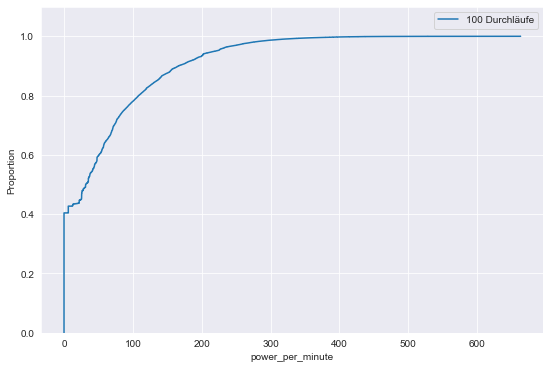

In [11]:
plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_single_row, x="power_per_minute", label="100 Durchläufe")

plt.ylim(0, 1.1)
plt.legend()
plt.show()

## Öffnungszeiten

In diesem Beispiel werden die Öffnungszeiten in der json auf 8-22 Uhr gesetzt (480 bis 1320 Minuten). Die Option "accessible_all_day" wird auch "0" gesetzt. Somit können lediglich zu den Öffnungszeiten EVs zum Laden erscheinen


soc_begin:  gauss , [24.02152763]
soc_begin:  gauss , [22.81339612]
soc_begin:  gauss , [43.16309711]
soc_begin:  gauss , [10.95952301]
soc_begin:  gauss , [29.92994834]
soc_begin:  gauss , [36.87356302]
soc_begin:  gauss , [18.05195304]
soc_begin:  gauss , [31.82460585]
soc_begin:  gauss , [46.70778084]
soc_begin:  gauss , [16.28622423]
soc_begin:  gauss , [45.5329102]
Anzahl geladener EVs:  11
Abgewiesene EVs:  0
Maximale Last:  261.1387900355872 kWh
Minuten über 60% der maximalen Last (156.68 kWh): 54 Entsprechen  3.75 %
Minuten über 70% der maximalen Last (182.80 kWh): 39 Entsprechen  2.71 %
Minuten über 80% der maximalen Last (208.91 kWh): 16 Entsprechen  1.11 %
Minuten über 90% der maximalen Last (235.02 kWh): 7 Entsprechen  0.49 %
Minuten über 95% der maximalen Last (248.08 kWh): 6 Entsprechen  0.42 %


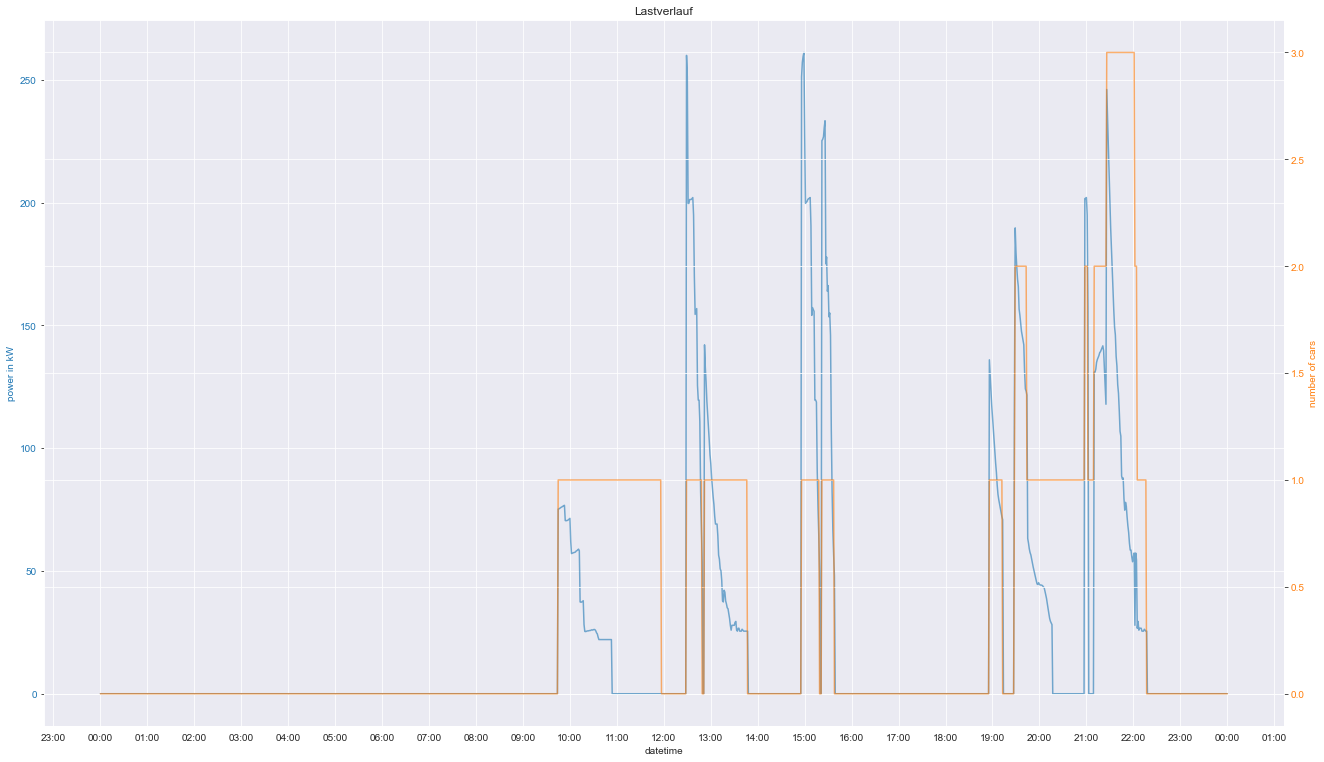

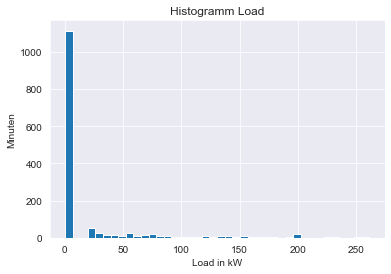

In [21]:
import model_final
importlib.reload(model_final)
df_results, anzahl_evs, anzahl_evs_abgewiesen = model_final.simulation("settings_final.json")
model_final.auswertung(df_results)
model_final.plot(df_results)